<a href="https://colab.research.google.com/github/Yash111416/Data_Science_projects/blob/main/Machine_learning_project_from__scratch01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df['class'].unique()
# Here we have changed the value of teh 'g' to zero(0), and the value of 'h' to one(1)

array([0, 1])

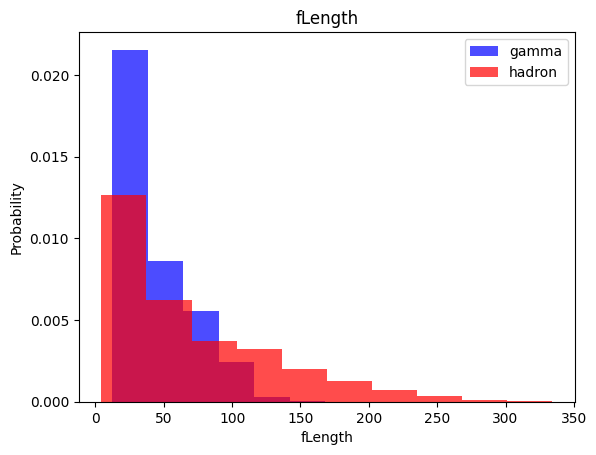

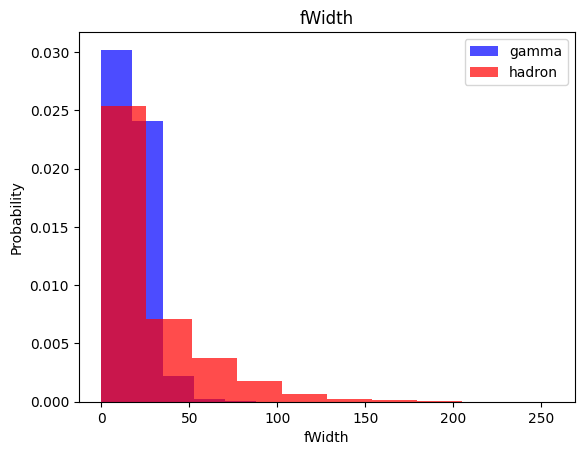

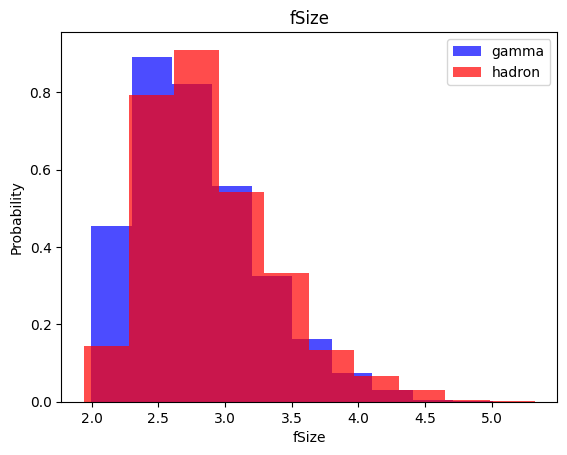

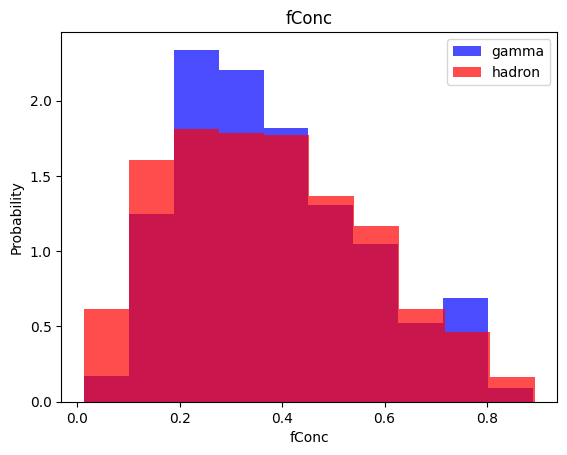

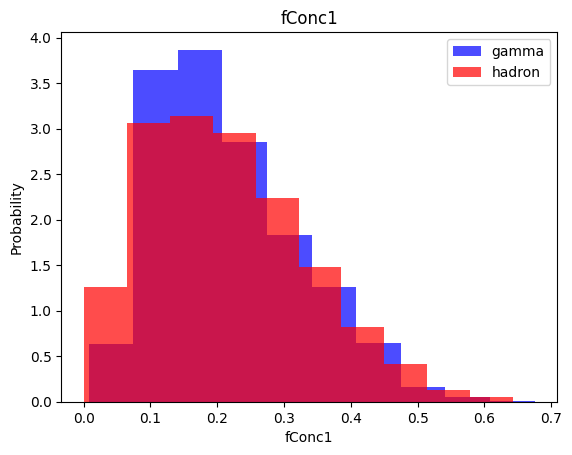

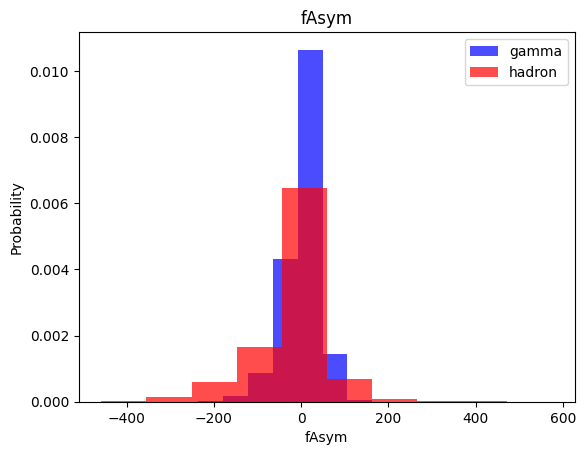

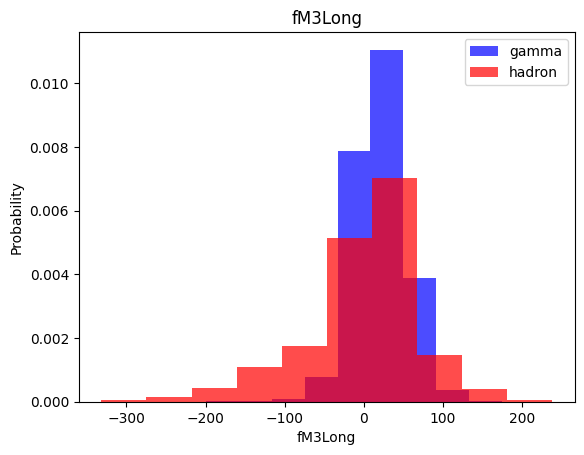

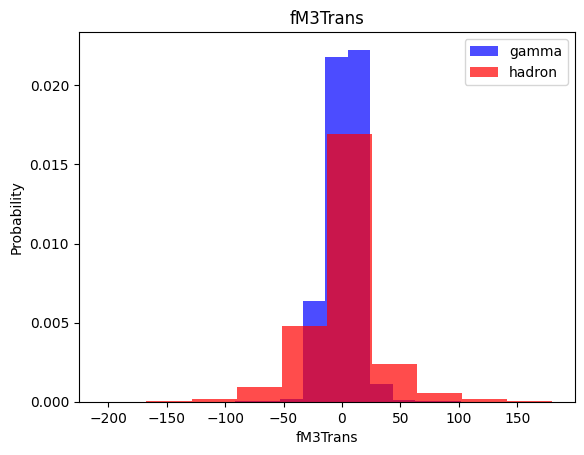

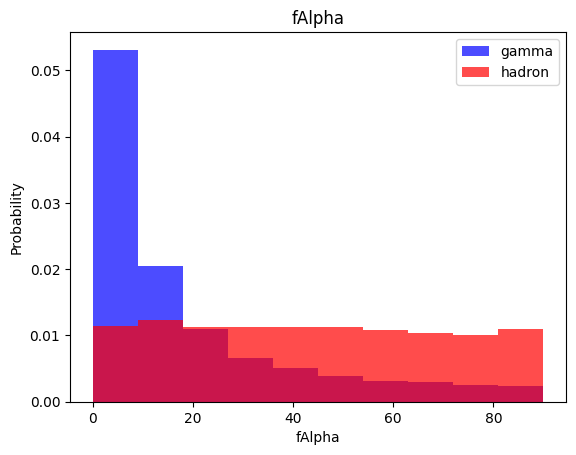

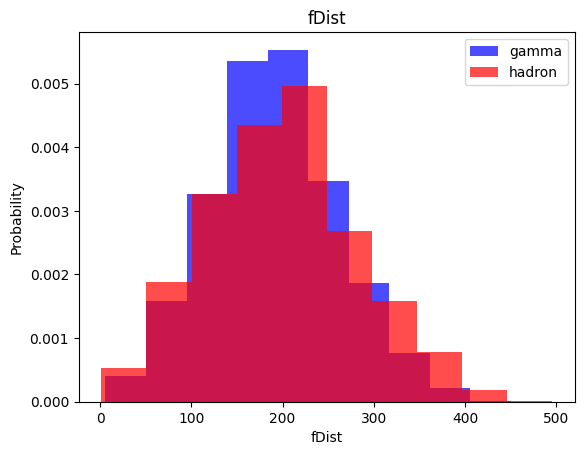

In [4]:
for label in cols[:-1]:
  plt.hist(df[df['class']==0][label], color = 'blue',label = 'gamma', alpha =0.7, density = True)
  plt.hist(df[df['class']==1][label], color = 'red',label = 'hadron', alpha =0.7, density = True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()



### Train, validation, test datasets


In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

### Scaling


In [6]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y


In [7]:
train, X_train, y_train = scale_dataset(train, oversample= True)
valid, X_valid, y_valid = scale_dataset(valid, oversample= False)
test, X_test, y_test = scale_dataset(test, oversample= False)

In [8]:
len(y_train), len(X_train)

(14818, 14818)

In [9]:
sum(y_train == 1), sum(y_train == 0)

(7409, 7409)

K nearest neighbor
1. Eucledian distance
distance = sqrt((x1-x2)ˆ2 + (y1-y2)ˆ2)


In [10]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)



KNeighborsClassifier()

In [11]:
y_predict = knn_model.predict(X_test)


In [12]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2492
           1       0.72      0.73      0.73      1312

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804




### Naive Bayes
Naive Bayes algorithm is one of the crucial algorithms in machine learning that helps with classification problems. It is derived from Bayes probability theory and is used for text classification, where you train high dimensional dataset


In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)


In [15]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      2492
           1       0.67      0.41      0.51      1312

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



### Logistic Regression
It is used for predicting the categorical dependent variable using a given set of independent variable

In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2492
           1       0.66      0.72      0.69      1312

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



### Support Vector Machine (SVM)
Support Vector Machine or SVM is one of the most popular Supervised LEarning Algorithms, which is used for classification as well as Regression Problems.

The Goal of the SVM algorithm is to create th best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put thenew data point in the correct category in the future.
The best decision boundary is called a Hyperplane.

SVM chooses the extreme points/vectors that helps creating teh hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine

In [18]:
from sklearn.svm import SVC


In [19]:
svc = SVC()
svc = svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2492
           1       0.79      0.80      0.79      1312

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



### Neural Network
A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by human brain.
Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, conects to another and has an associated weight and threshold. If teh putput of any individual node is above the specified threshold value, that node is activated, sending data to teh next layer of the network. Otherwise, no data is passed along to the next layer of the network.

There are 3 types of learning in neural network:

1. Supervised learning
2. Unsupervised learning
3. Reinforcement learning

In [20]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras


In [40]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 7))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'],label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel("Binary CrossEntropy")
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val+accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()



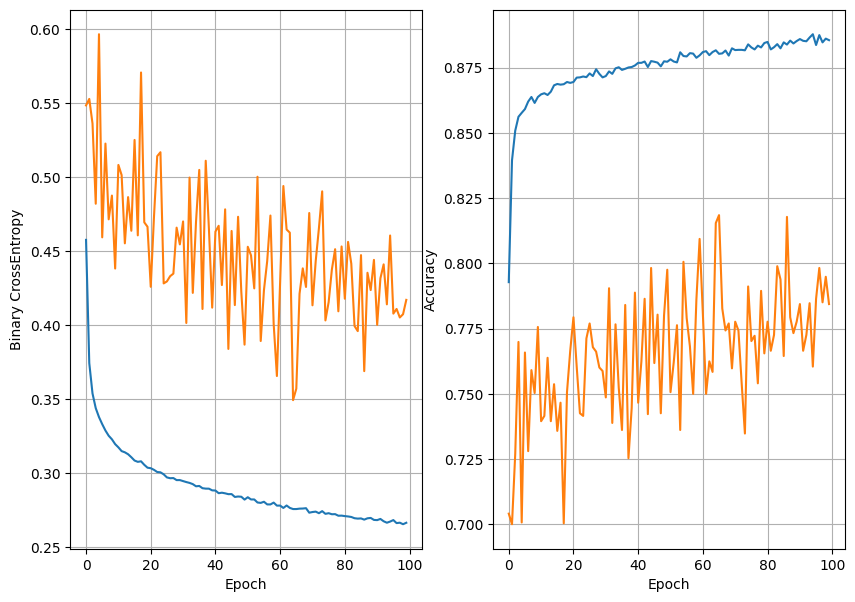

In [41]:
plot_history(history)

In [43]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = keras.Sequential([
      layers.Dense(64, activation = 'relu', input_shape=(10, )),
      layers.Dropout(dropout_prob),
      layers.Dense(32, activation ='relu'),
      layers.Dropout(dropout_prob),
      layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer = keras.optimizers.Adam(learning_rate = lr),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
  history = nn_model.fit(X_train, y_train,
                       epochs = epochs, batch_size = batch_size,
                       validation_split= 0.2,
                         verbose = 0)
  return nn_model, history

16 nodes, dropout 0, lr is 0.1, batch_size is 32


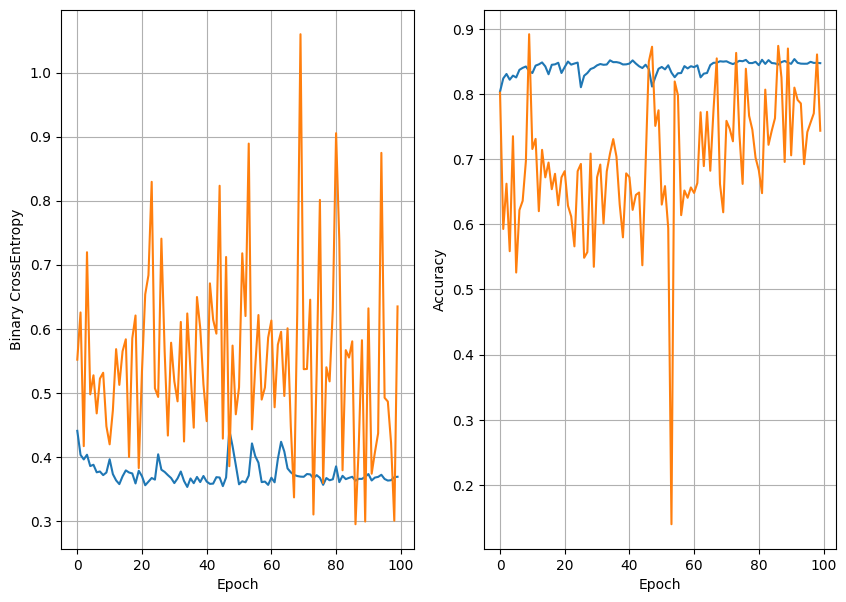

119/119 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8623
16 nodes, dropout 0, lr is 0.1, batch_size is 64


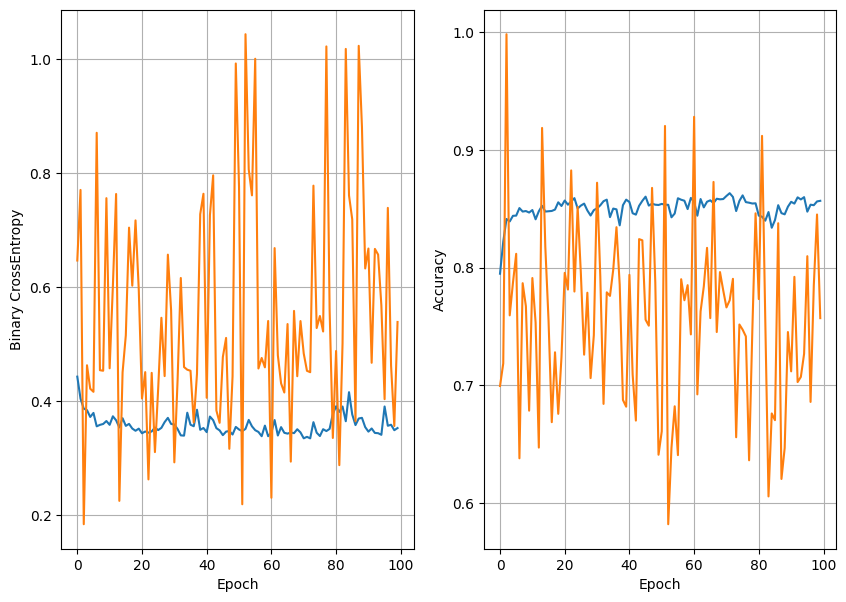

119/119 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.8725
16 nodes, dropout 0, lr is 0.1, batch_size is 128


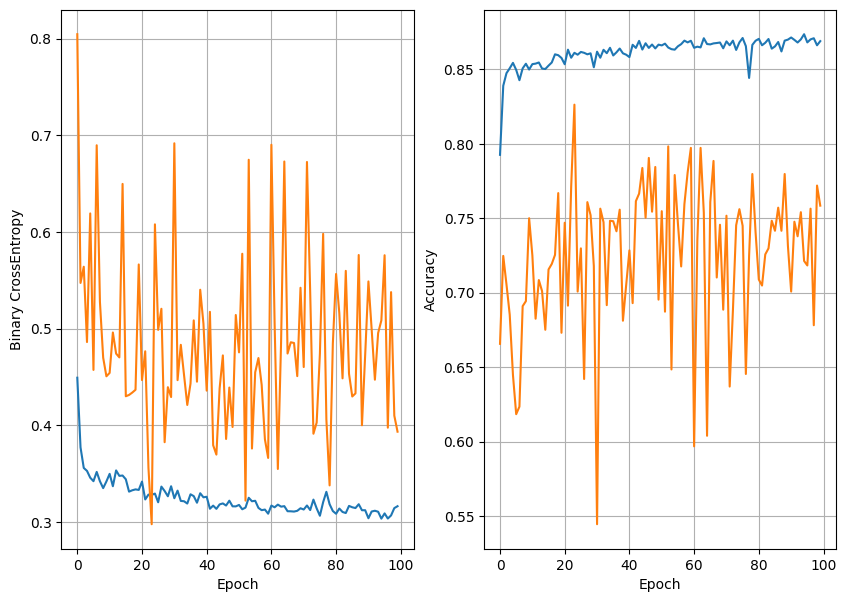

119/119 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8722
16 nodes, dropout 0, lr is 0.005, batch_size is 32


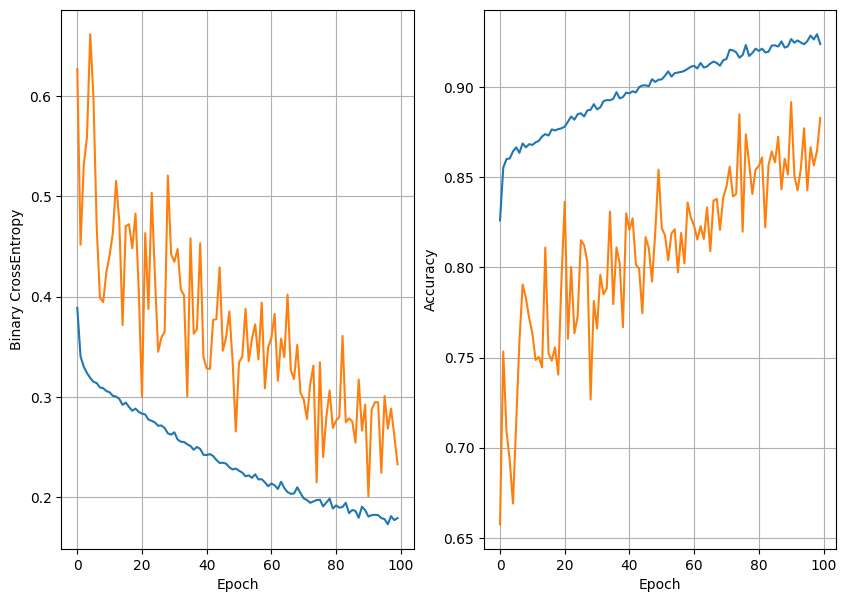

119/119 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.8580
16 nodes, dropout 0, lr is 0.005, batch_size is 64


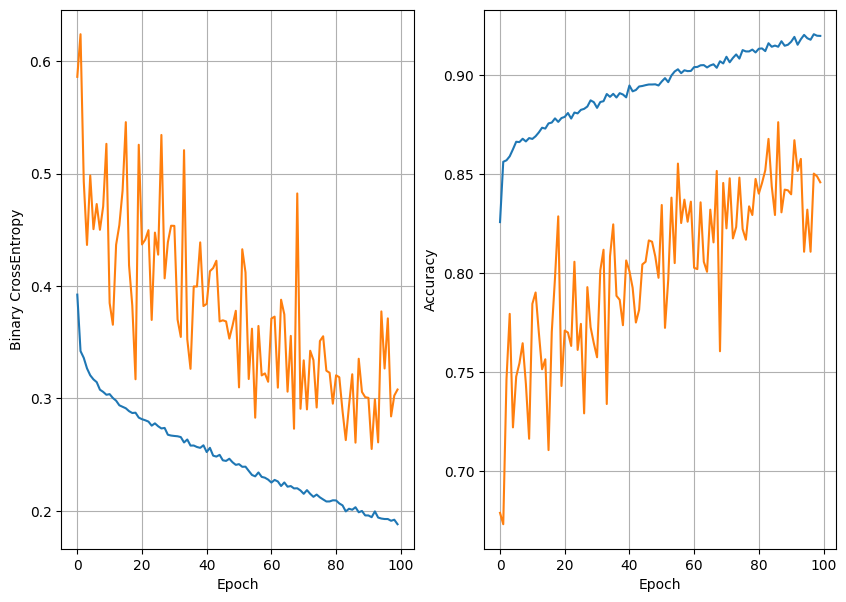

119/119 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8715
16 nodes, dropout 0, lr is 0.005, batch_size is 128


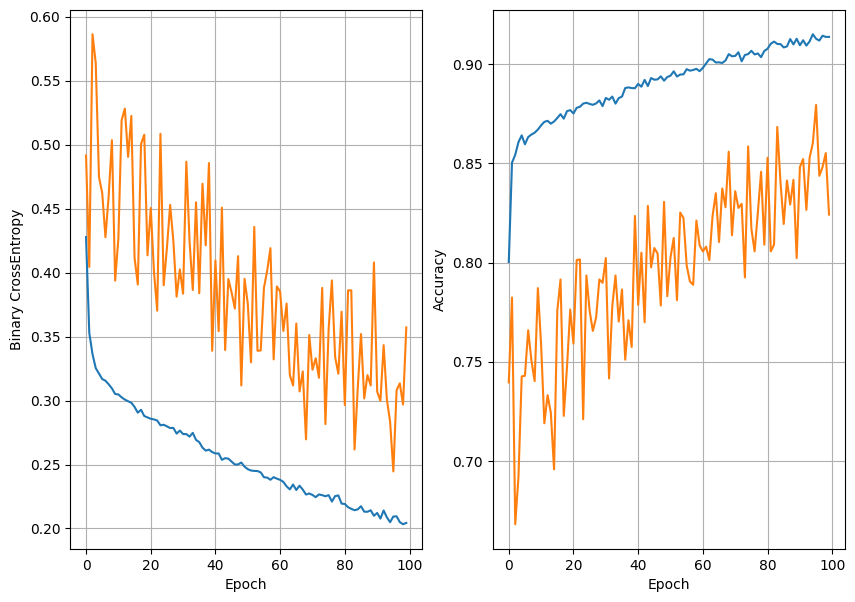

119/119 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8670
16 nodes, dropout 0, lr is 0.001, batch_size is 32


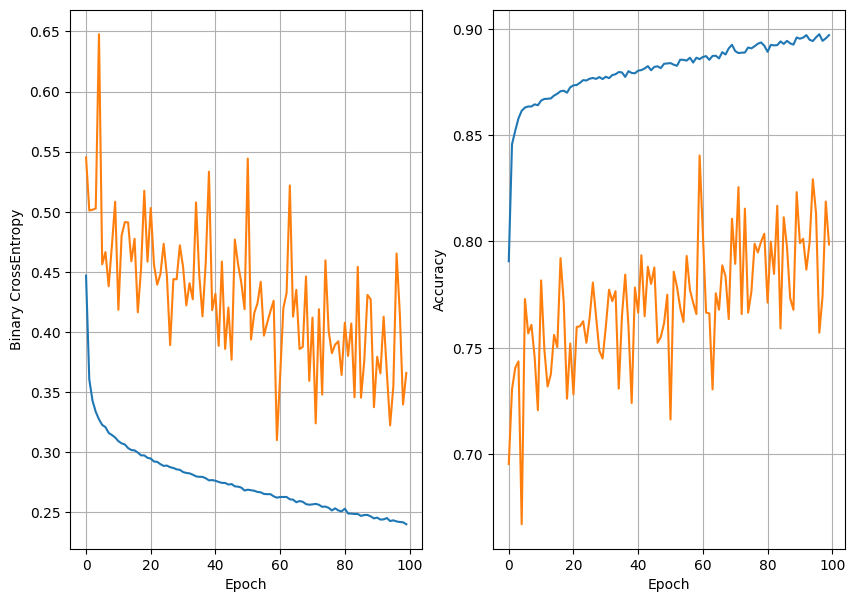

119/119 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8728
16 nodes, dropout 0, lr is 0.001, batch_size is 64


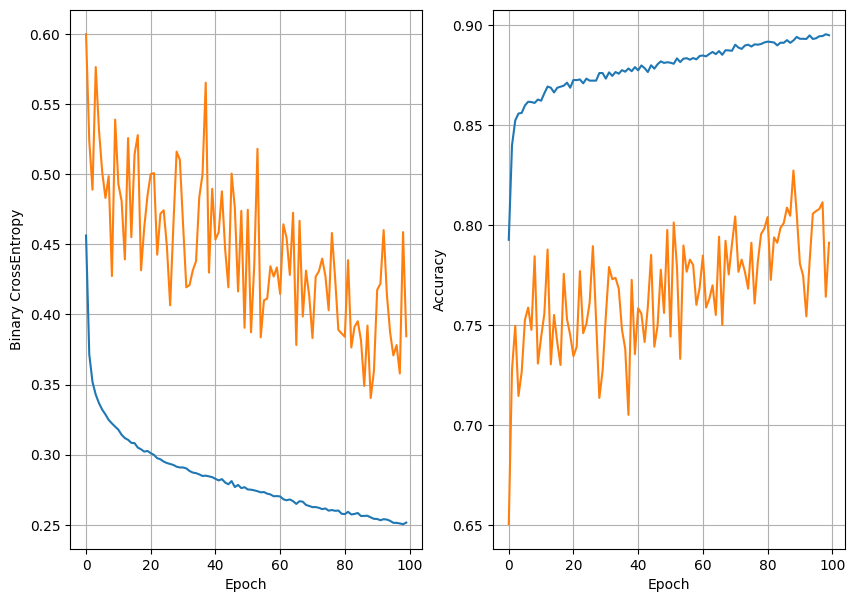

119/119 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8778
16 nodes, dropout 0, lr is 0.001, batch_size is 128


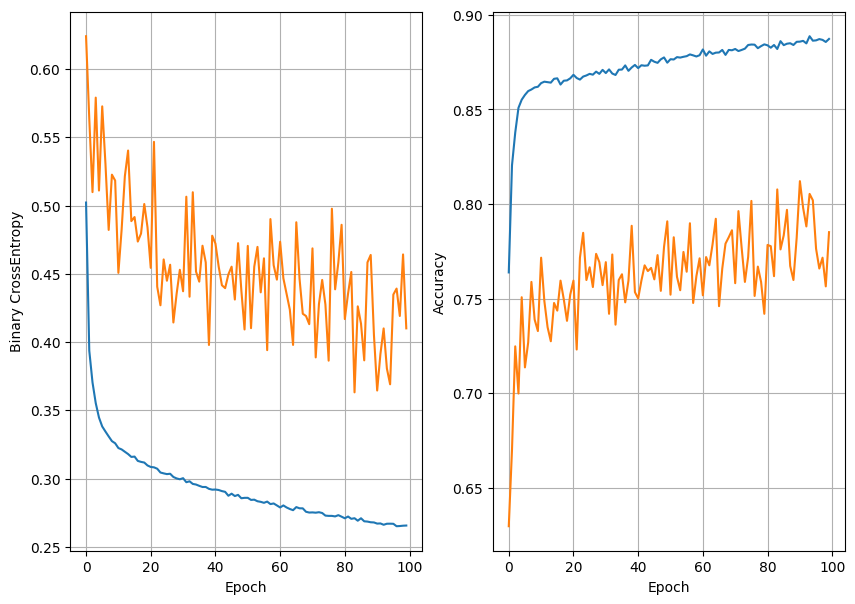

119/119 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.8801
16 nodes, dropout 0.2, lr is 0.1, batch_size is 32


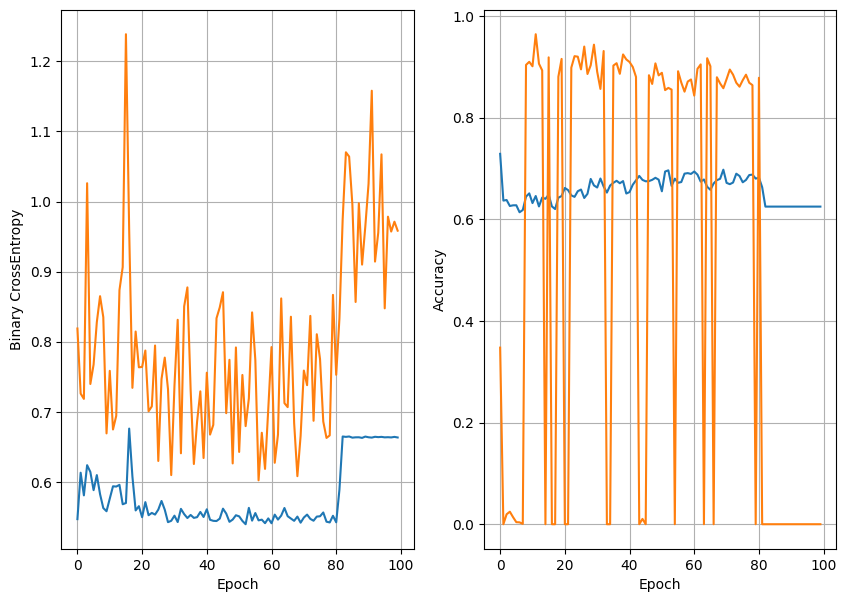

119/119 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.6391
16 nodes, dropout 0.2, lr is 0.1, batch_size is 64


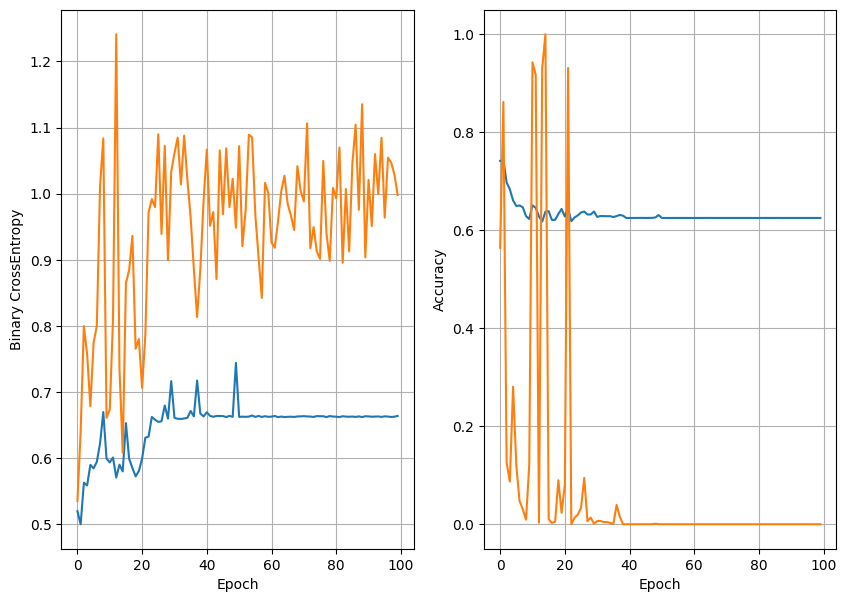

119/119 [==============================] - 0s 3ms/step - loss: 0.6541 - accuracy: 0.6391
16 nodes, dropout 0.2, lr is 0.1, batch_size is 128


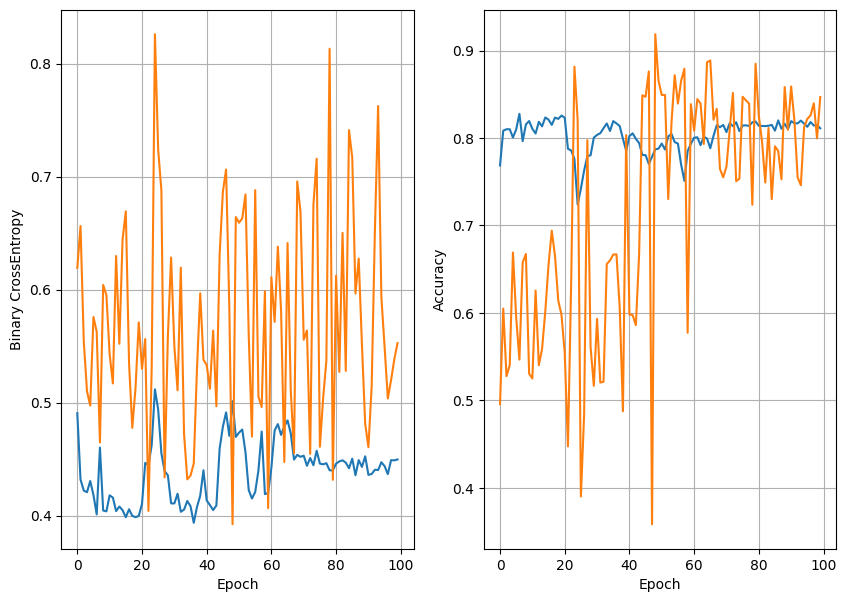

119/119 [==============================] - 0s 4ms/step - loss: 0.3971 - accuracy: 0.8325
16 nodes, dropout 0.2, lr is 0.005, batch_size is 32


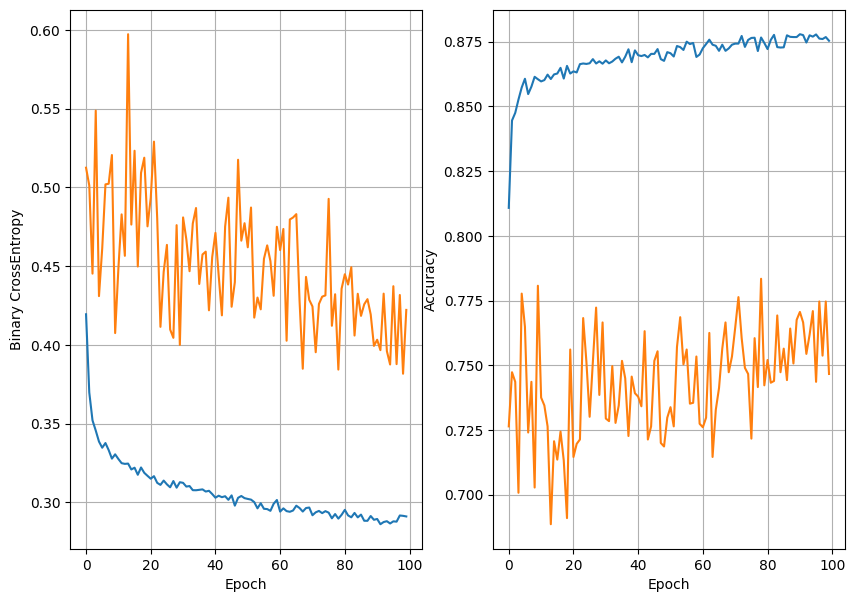

119/119 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8715
16 nodes, dropout 0.2, lr is 0.005, batch_size is 64


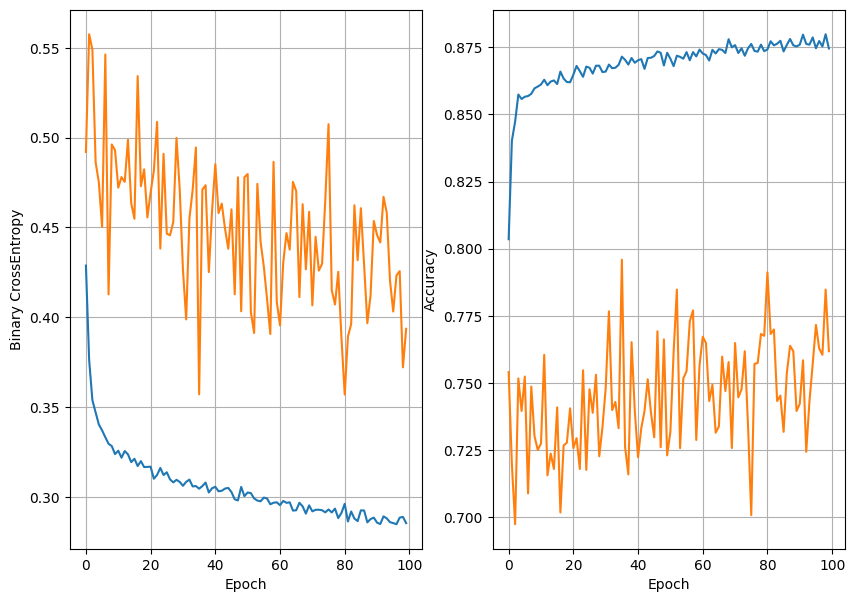

119/119 [==============================] - 0s 3ms/step - loss: 0.2974 - accuracy: 0.8793
16 nodes, dropout 0.2, lr is 0.005, batch_size is 128


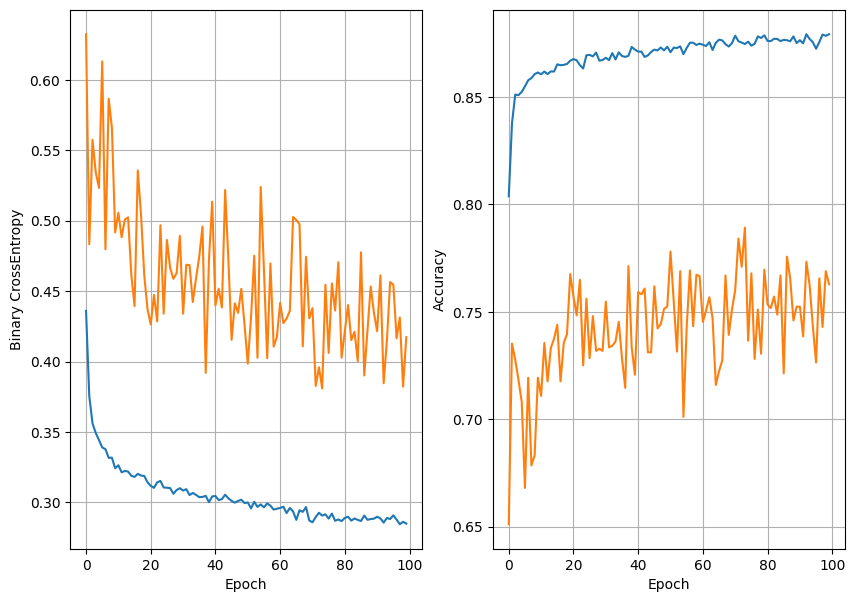

119/119 [==============================] - 0s 3ms/step - loss: 0.2933 - accuracy: 0.8814
16 nodes, dropout 0.2, lr is 0.001, batch_size is 32


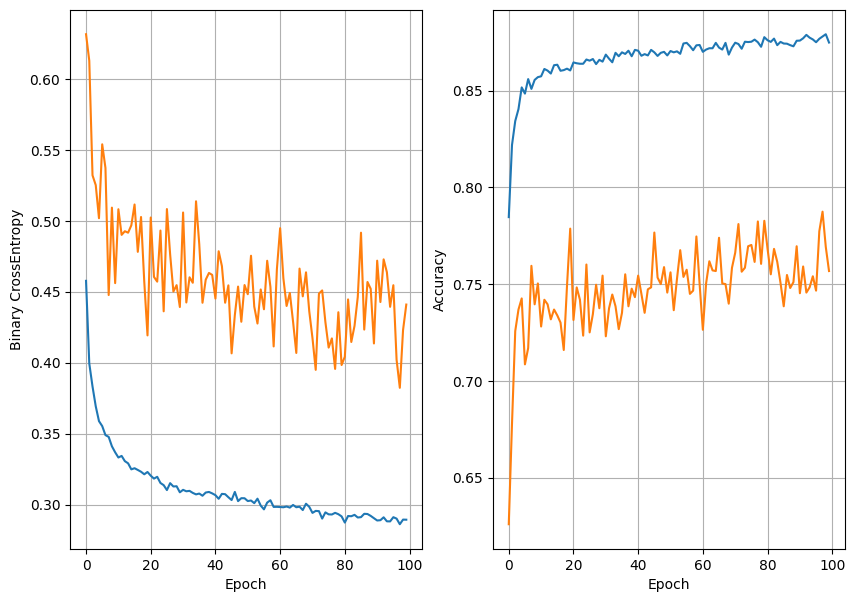

119/119 [==============================] - 0s 3ms/step - loss: 0.2924 - accuracy: 0.8807
16 nodes, dropout 0.2, lr is 0.001, batch_size is 64


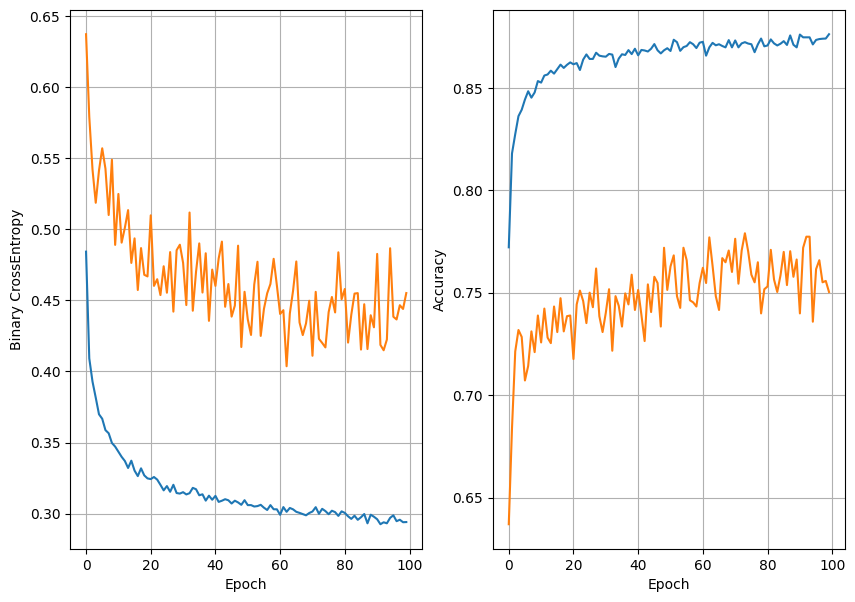

119/119 [==============================] - 0s 3ms/step - loss: 0.2938 - accuracy: 0.8788
16 nodes, dropout 0.2, lr is 0.001, batch_size is 128


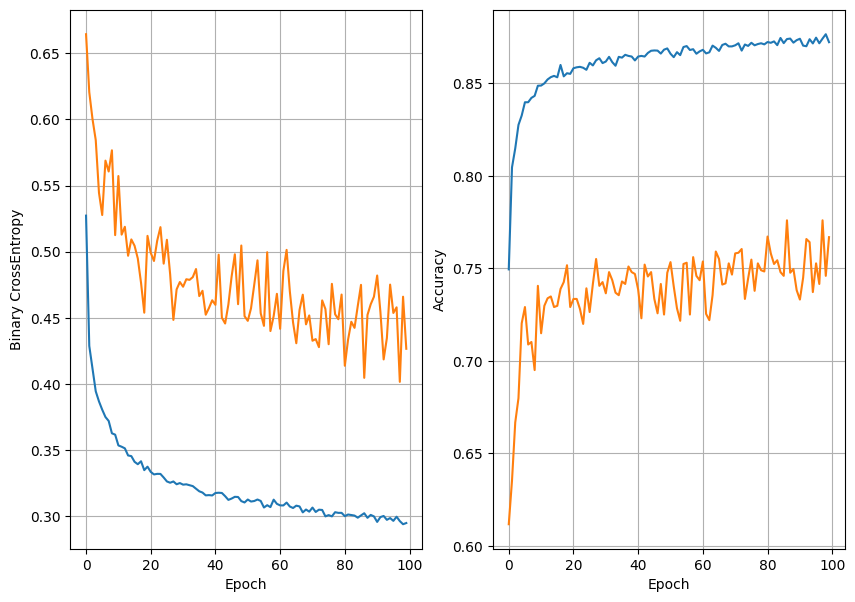

119/119 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8783
32 nodes, dropout 0, lr is 0.1, batch_size is 32


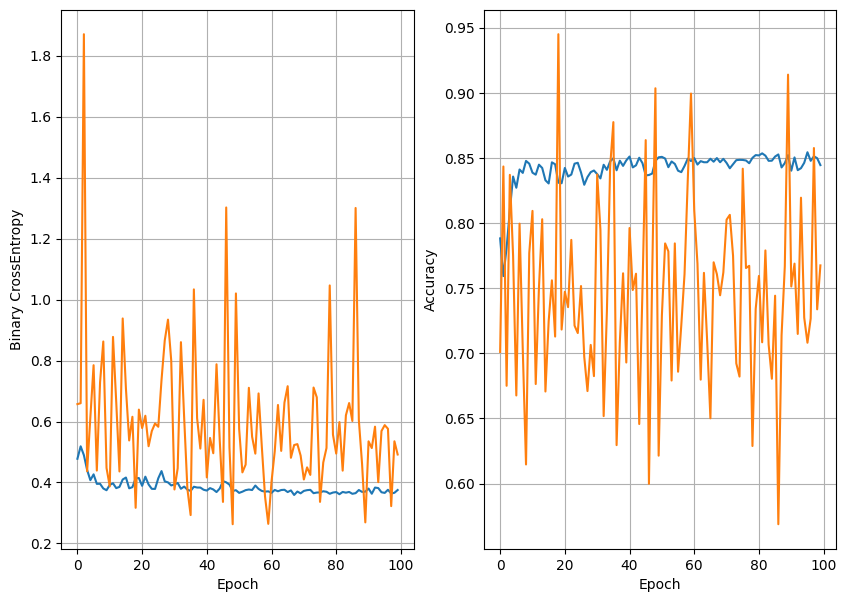

119/119 [==============================] - 0s 3ms/step - loss: 0.3487 - accuracy: 0.8575
32 nodes, dropout 0, lr is 0.1, batch_size is 64


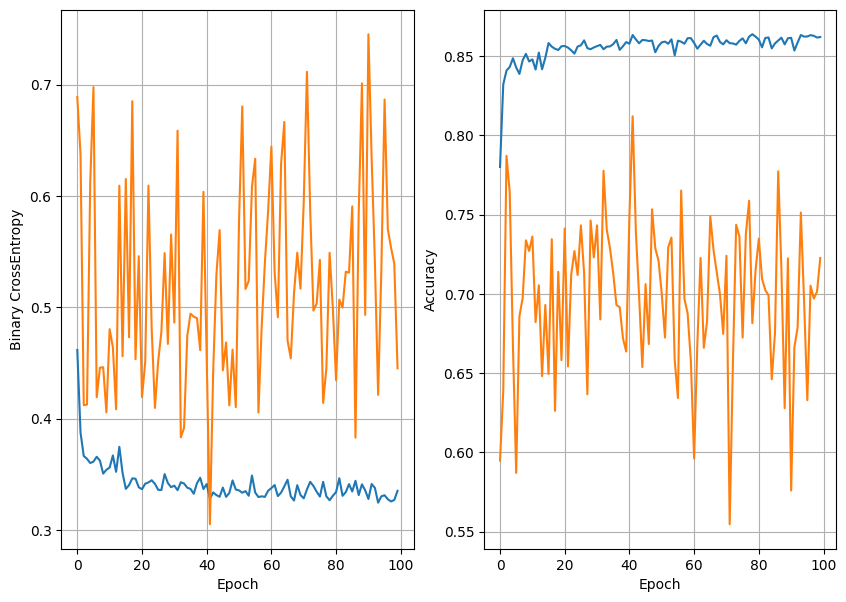

119/119 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.8580
32 nodes, dropout 0, lr is 0.1, batch_size is 128


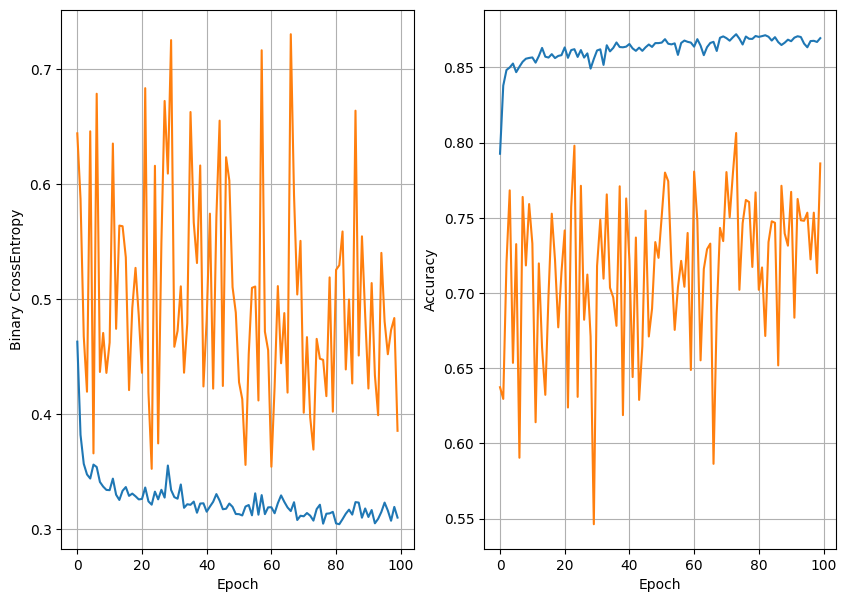

119/119 [==============================] - 0s 3ms/step - loss: 0.3440 - accuracy: 0.8649
32 nodes, dropout 0, lr is 0.005, batch_size is 32


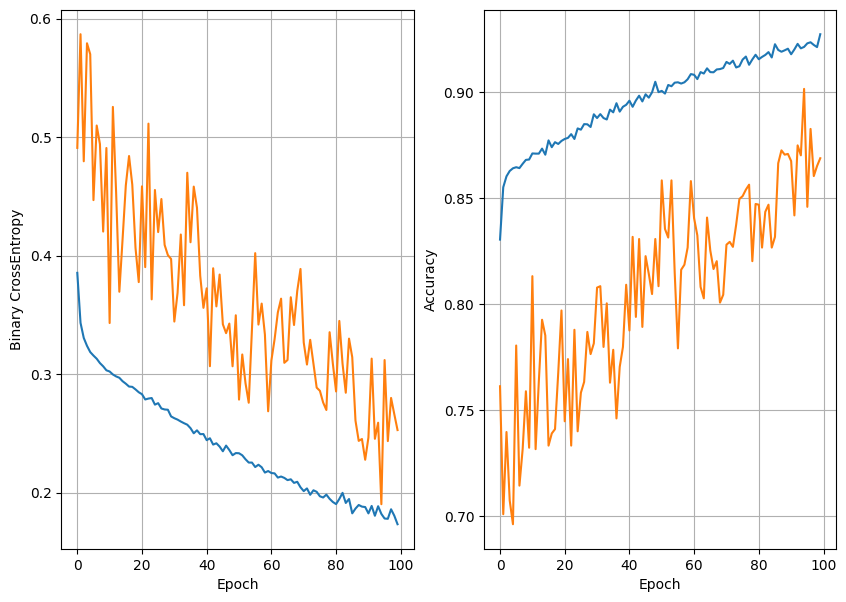

119/119 [==============================] - 0s 3ms/step - loss: 0.4495 - accuracy: 0.8612
32 nodes, dropout 0, lr is 0.005, batch_size is 64


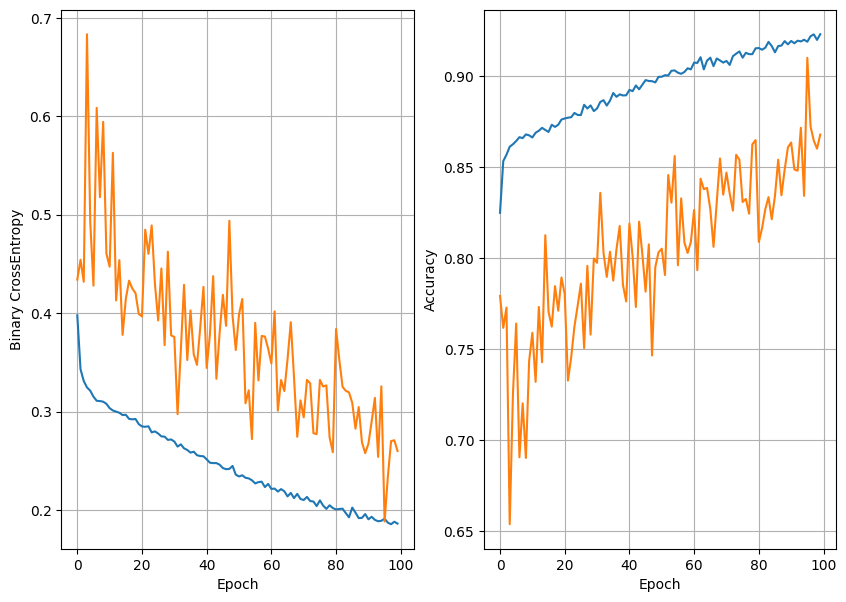

119/119 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.8630
32 nodes, dropout 0, lr is 0.005, batch_size is 128


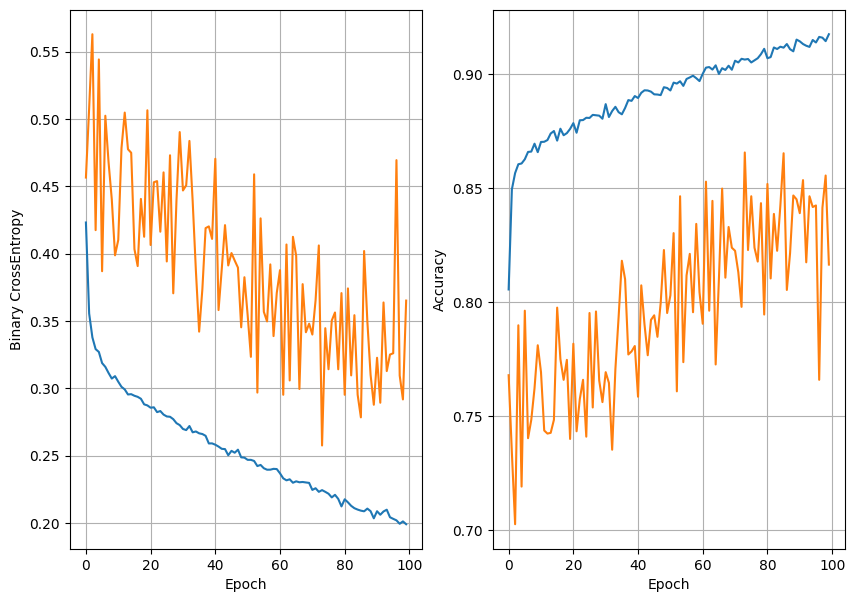

119/119 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.8683
32 nodes, dropout 0, lr is 0.001, batch_size is 32


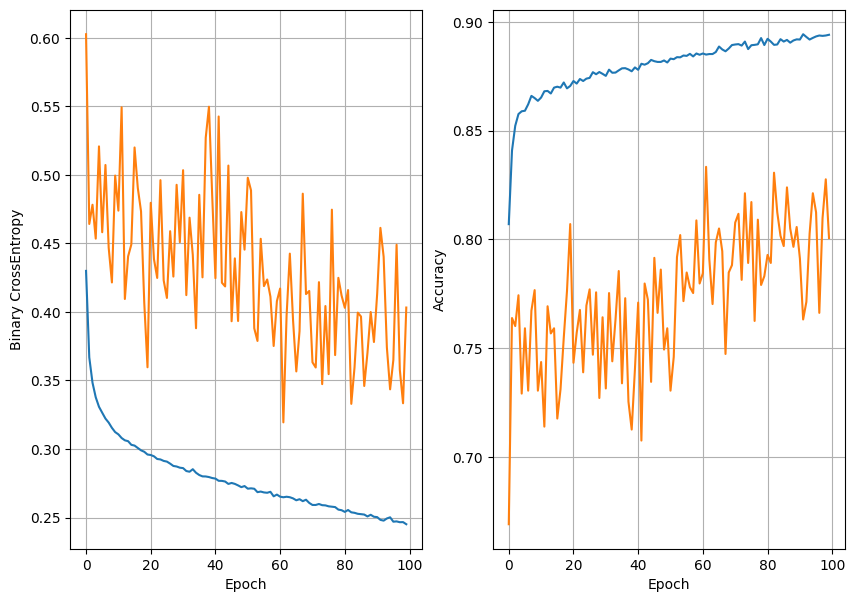

119/119 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.8751
32 nodes, dropout 0, lr is 0.001, batch_size is 64


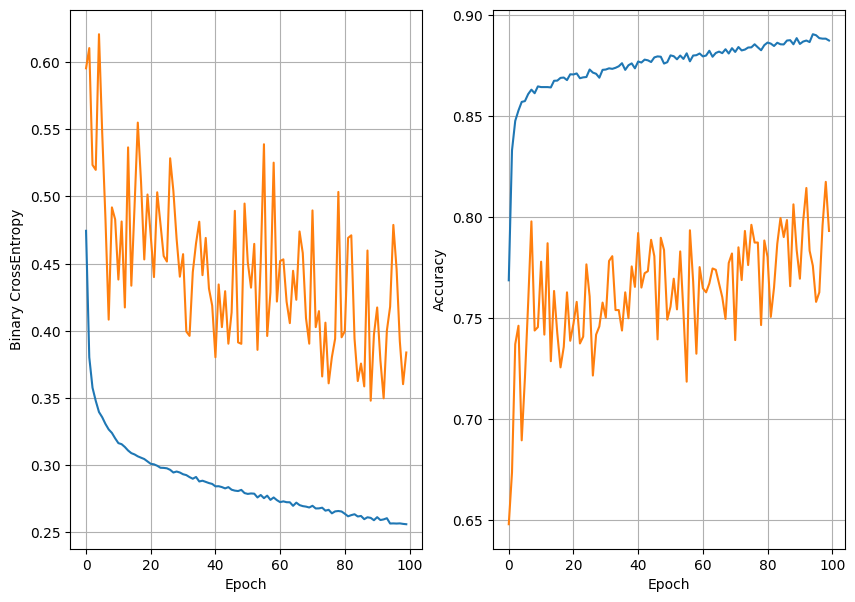

119/119 [==============================] - 0s 3ms/step - loss: 0.2990 - accuracy: 0.8793
32 nodes, dropout 0, lr is 0.001, batch_size is 128


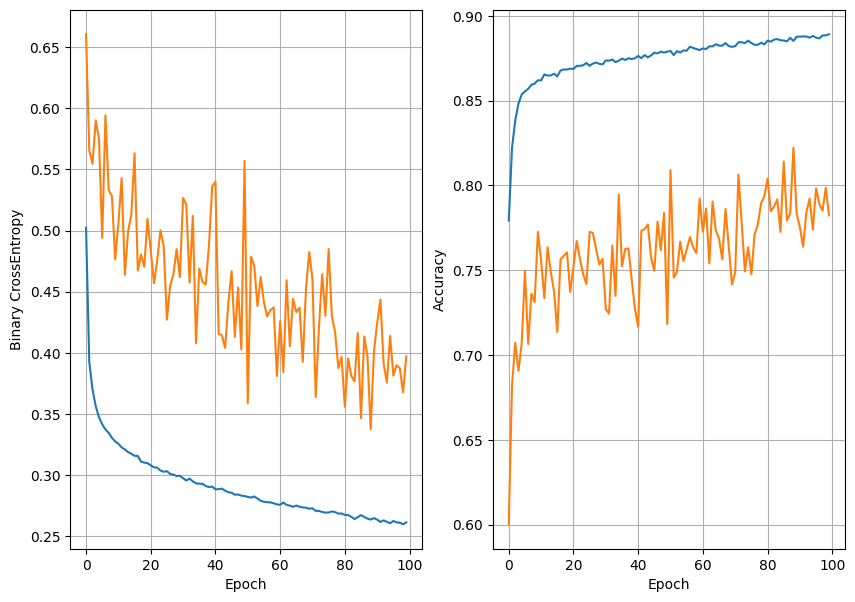

119/119 [==============================] - 0s 3ms/step - loss: 0.3015 - accuracy: 0.8767
32 nodes, dropout 0.2, lr is 0.1, batch_size is 32


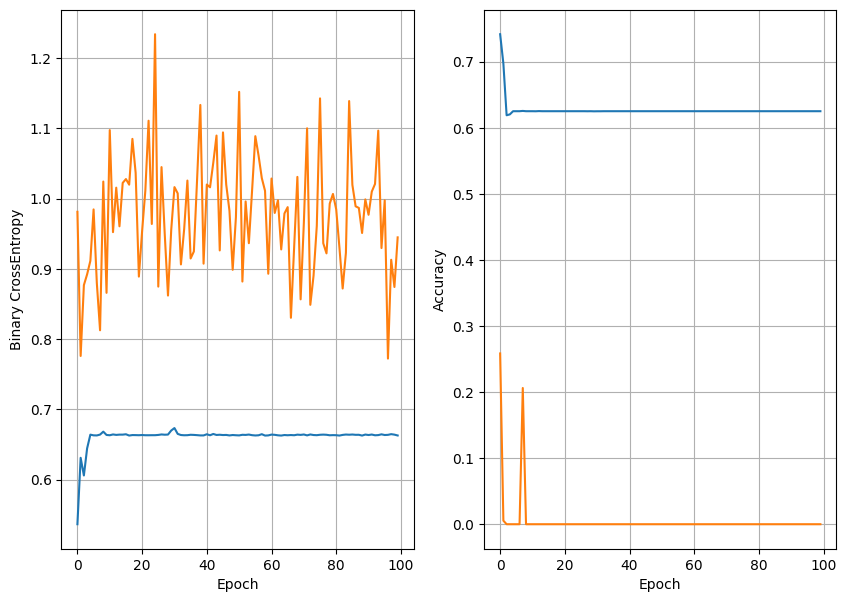

119/119 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.6391
32 nodes, dropout 0.2, lr is 0.1, batch_size is 64


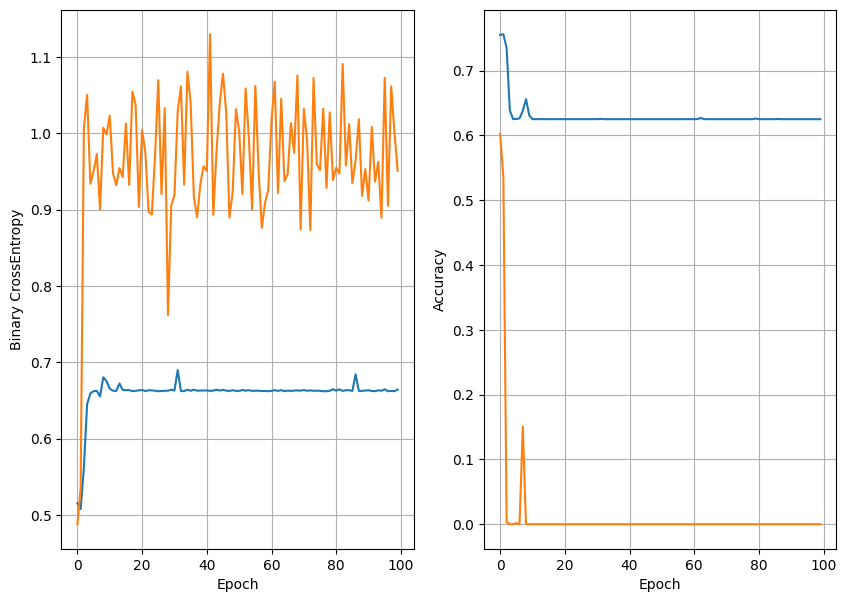

119/119 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.6391
32 nodes, dropout 0.2, lr is 0.1, batch_size is 128


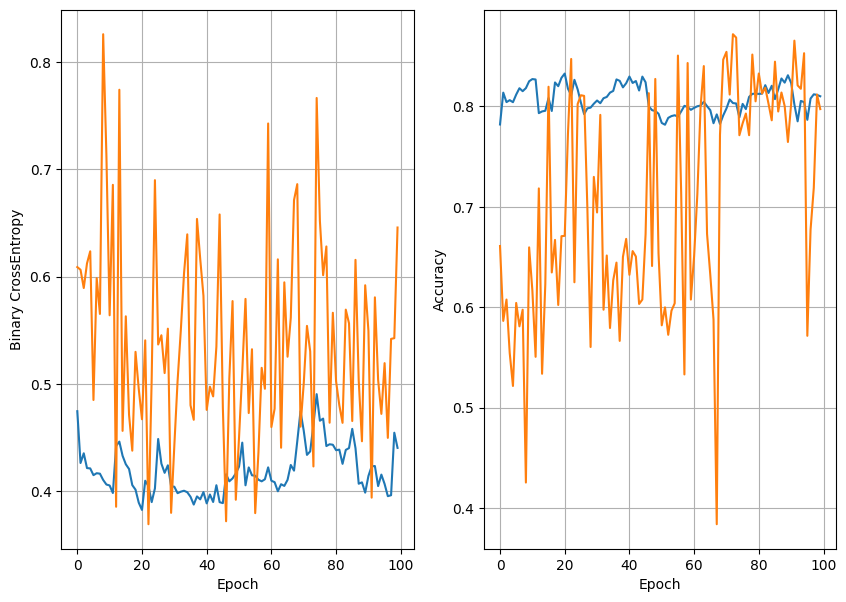

119/119 [==============================] - 0s 3ms/step - loss: 0.3760 - accuracy: 0.8591
32 nodes, dropout 0.2, lr is 0.005, batch_size is 32


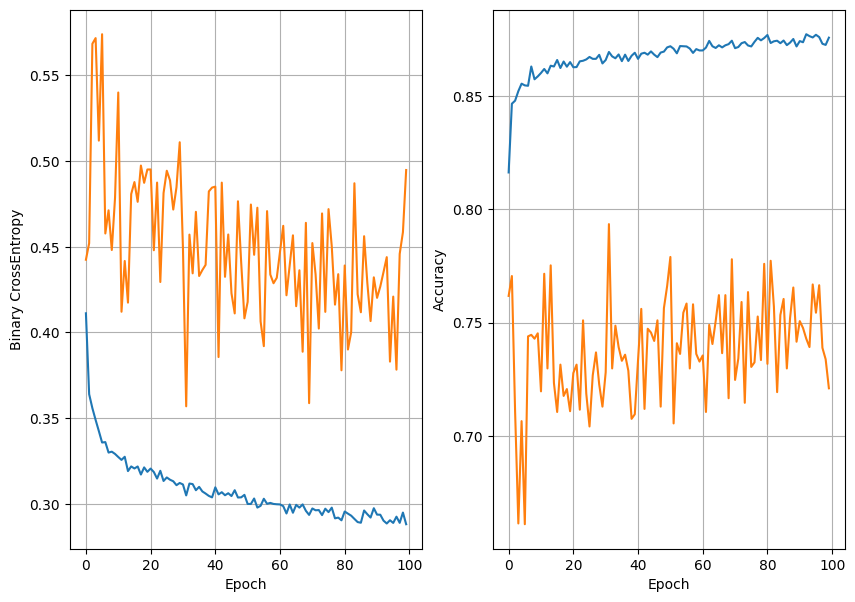

119/119 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8762
32 nodes, dropout 0.2, lr is 0.005, batch_size is 64


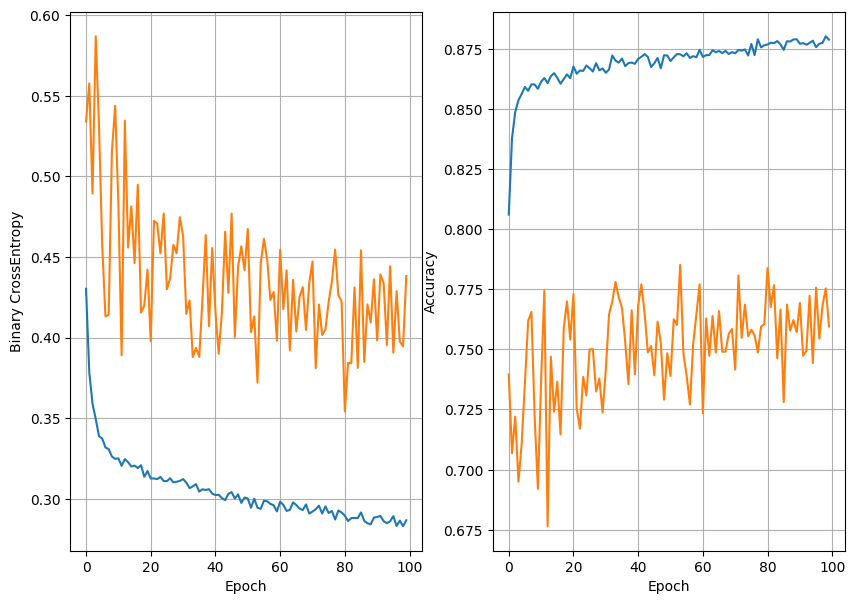

119/119 [==============================] - 0s 3ms/step - loss: 0.3030 - accuracy: 0.8780
32 nodes, dropout 0.2, lr is 0.005, batch_size is 128


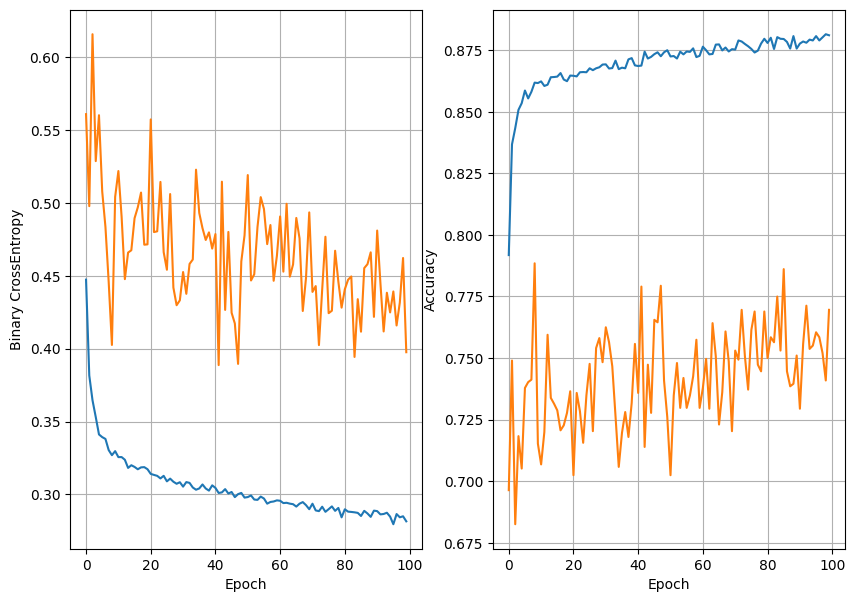

119/119 [==============================] - 0s 3ms/step - loss: 0.3007 - accuracy: 0.8754
32 nodes, dropout 0.2, lr is 0.001, batch_size is 32


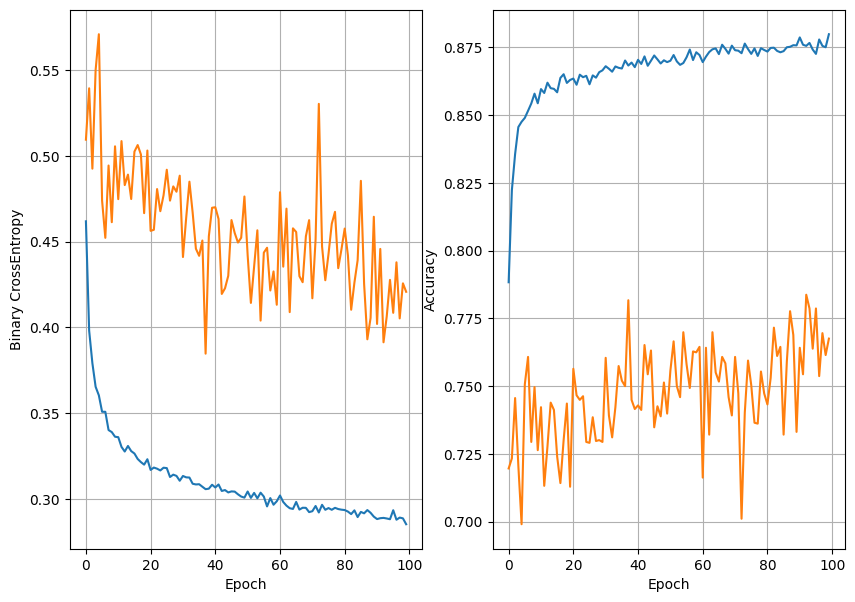

119/119 [==============================] - 0s 3ms/step - loss: 0.2934 - accuracy: 0.8804
32 nodes, dropout 0.2, lr is 0.001, batch_size is 64


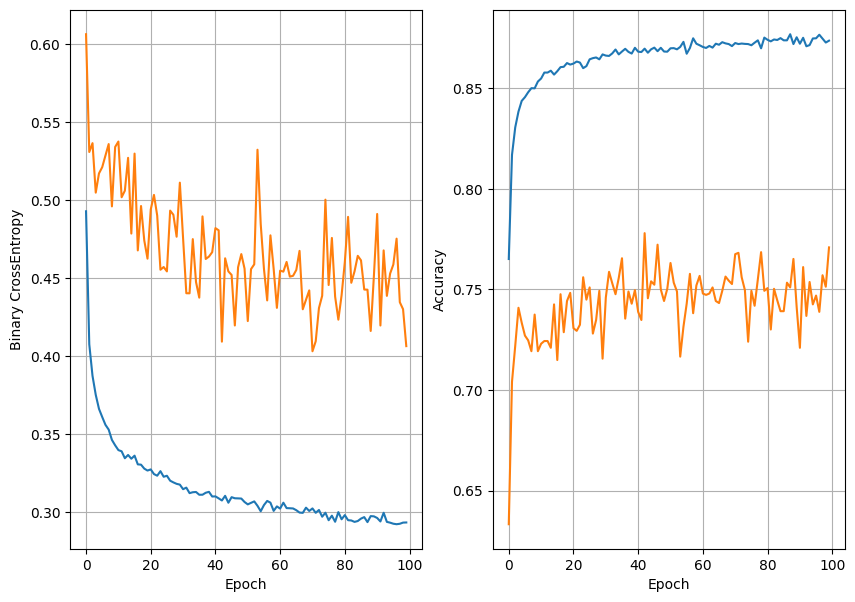

119/119 [==============================] - 0s 3ms/step - loss: 0.2915 - accuracy: 0.8778
32 nodes, dropout 0.2, lr is 0.001, batch_size is 128


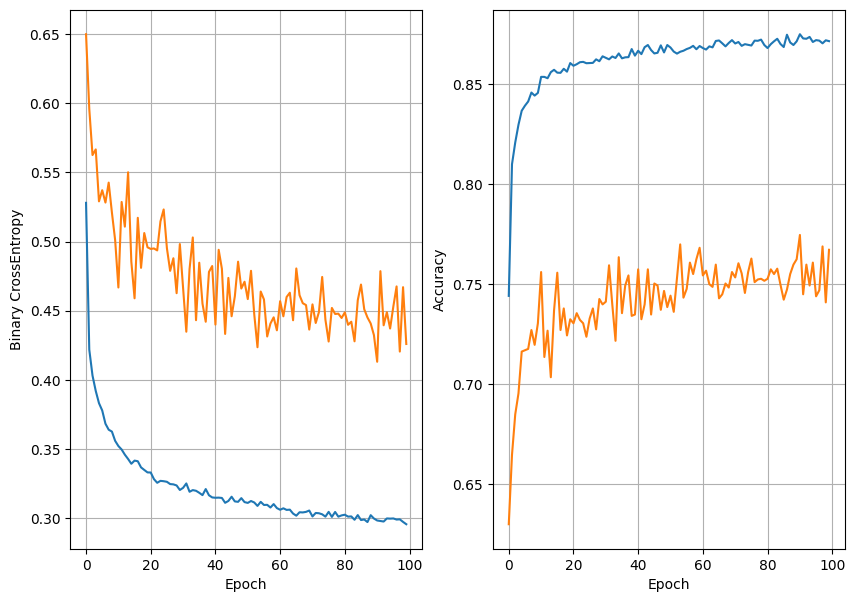

119/119 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.8785
64 nodes, dropout 0, lr is 0.1, batch_size is 32


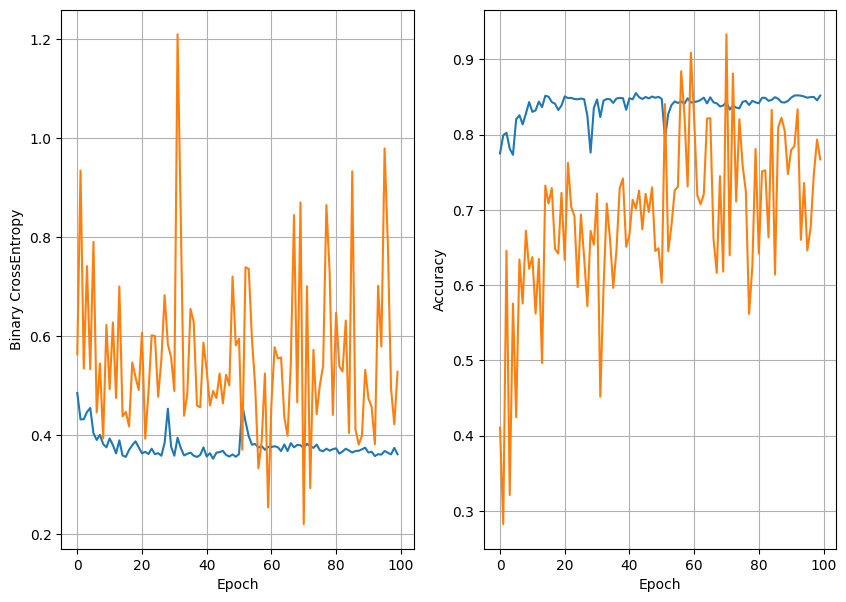

119/119 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.8720
64 nodes, dropout 0, lr is 0.1, batch_size is 64


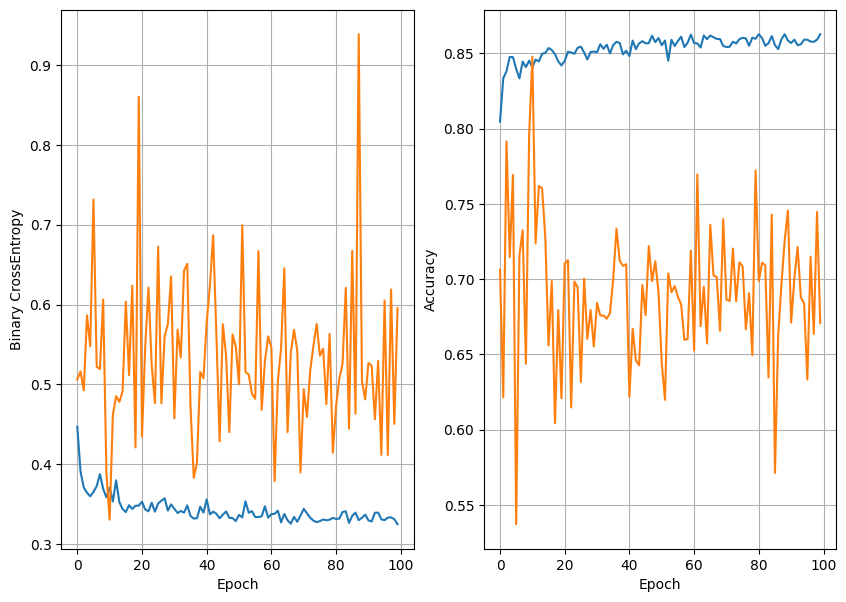

119/119 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8615
64 nodes, dropout 0, lr is 0.1, batch_size is 128


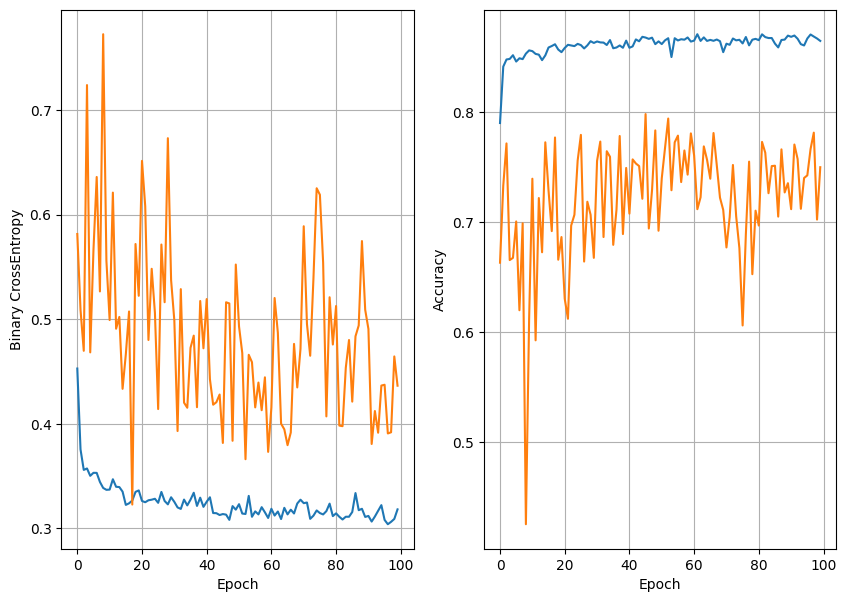

119/119 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.8659
64 nodes, dropout 0, lr is 0.005, batch_size is 32


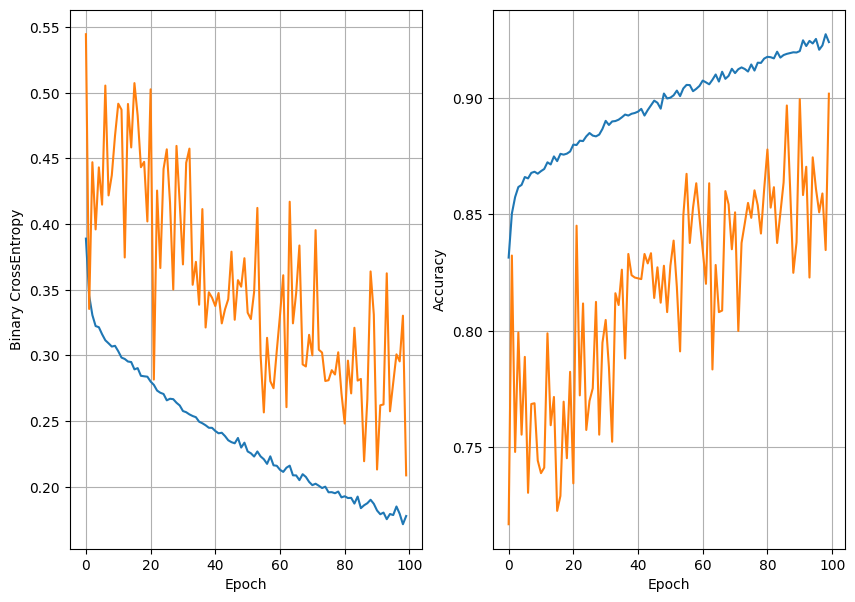

119/119 [==============================] - 0s 3ms/step - loss: 0.4935 - accuracy: 0.8494
64 nodes, dropout 0, lr is 0.005, batch_size is 64


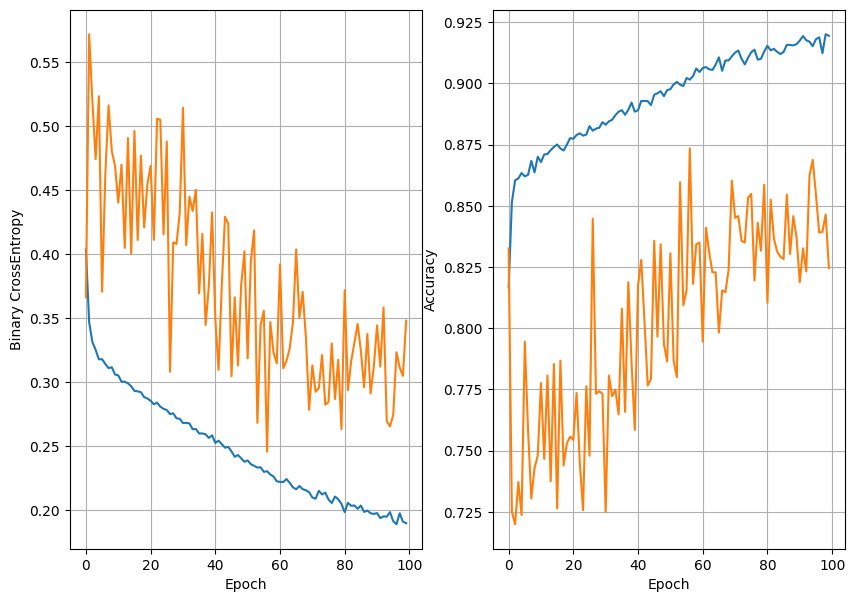

119/119 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8683
64 nodes, dropout 0, lr is 0.005, batch_size is 128


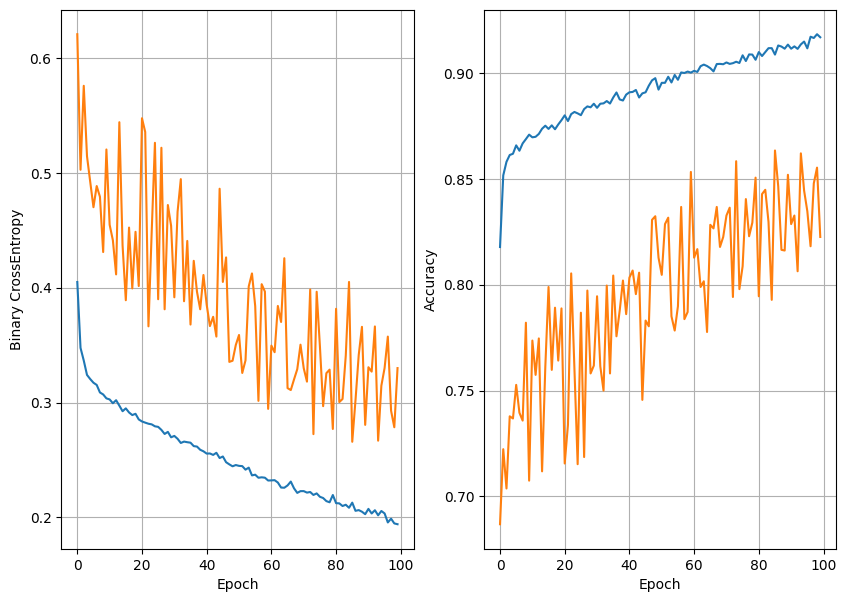

119/119 [==============================] - 1s 4ms/step - loss: 0.3950 - accuracy: 0.8670
64 nodes, dropout 0, lr is 0.001, batch_size is 32


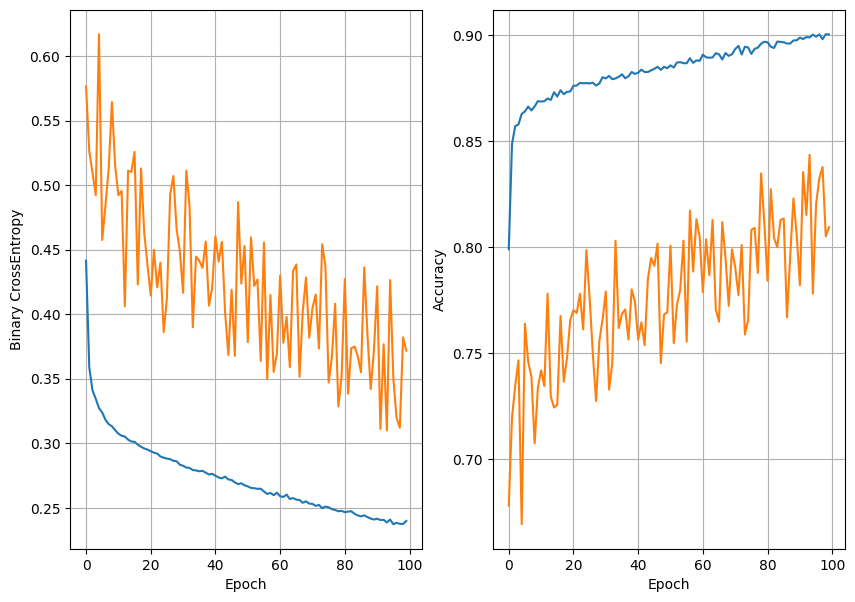

119/119 [==============================] - 0s 3ms/step - loss: 0.3189 - accuracy: 0.8691
64 nodes, dropout 0, lr is 0.001, batch_size is 64


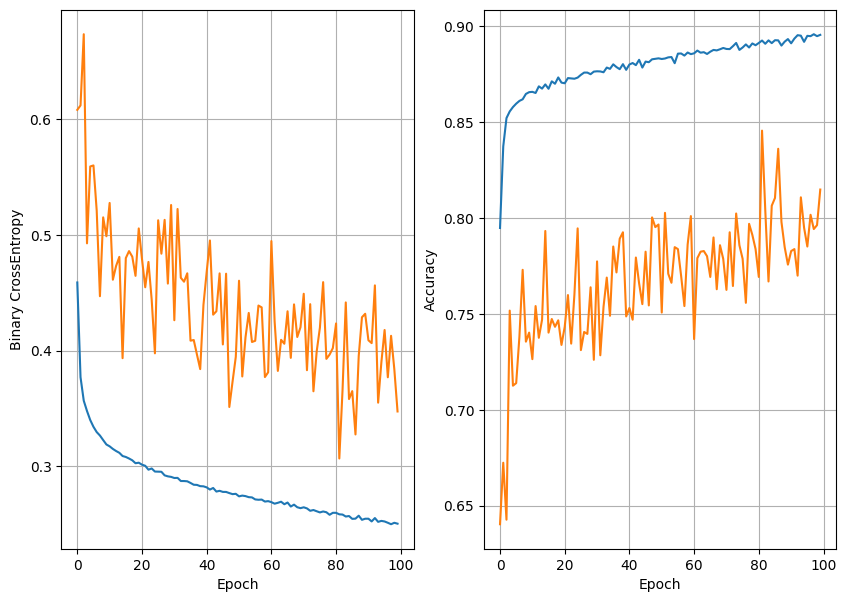

119/119 [==============================] - 0s 4ms/step - loss: 0.3072 - accuracy: 0.8791
64 nodes, dropout 0, lr is 0.001, batch_size is 128


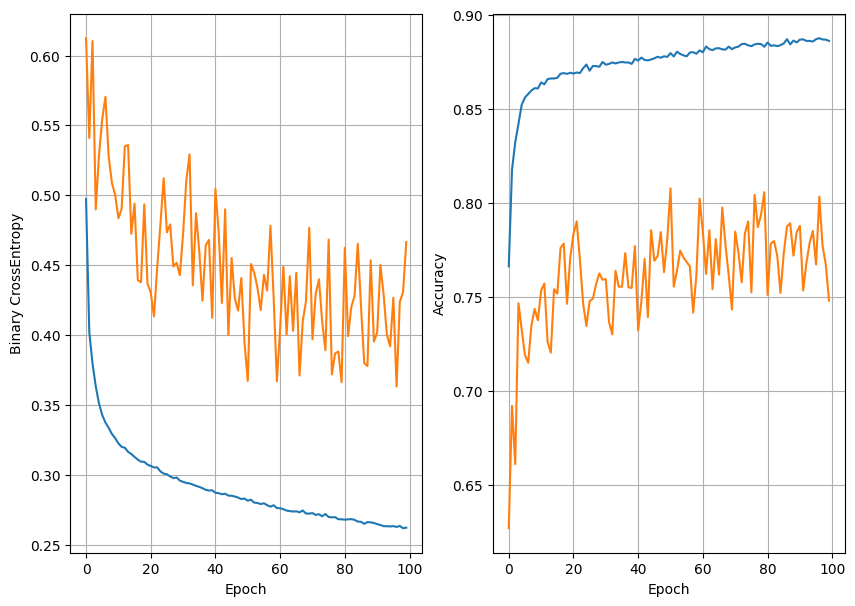

119/119 [==============================] - 0s 3ms/step - loss: 0.3078 - accuracy: 0.8728
64 nodes, dropout 0.2, lr is 0.1, batch_size is 32


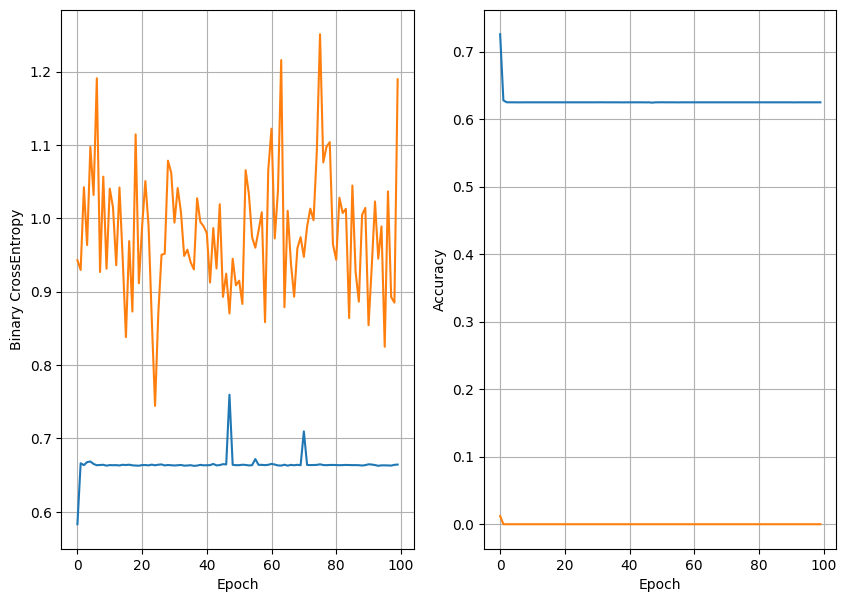

119/119 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.6391
64 nodes, dropout 0.2, lr is 0.1, batch_size is 64


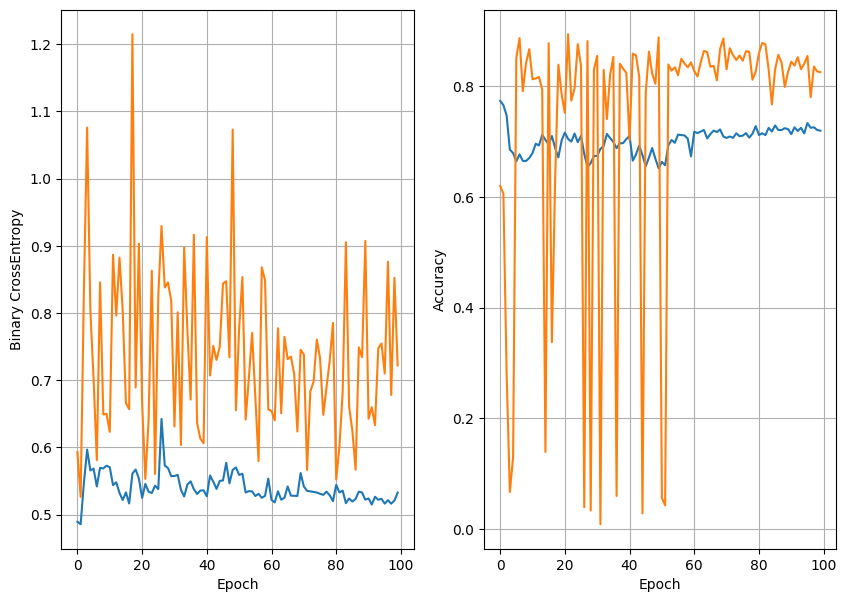

119/119 [==============================] - 0s 4ms/step - loss: 0.4577 - accuracy: 0.8241
64 nodes, dropout 0.2, lr is 0.1, batch_size is 128


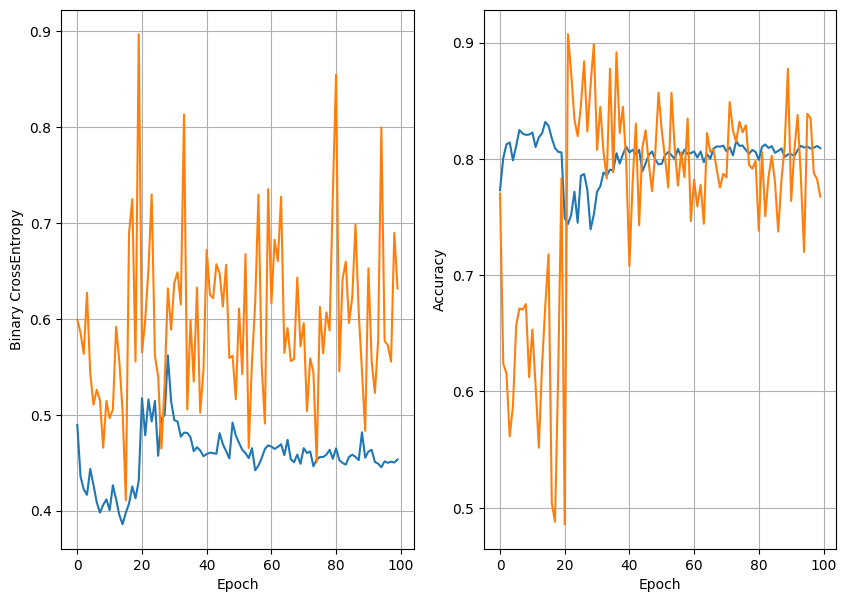

119/119 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.8523
64 nodes, dropout 0.2, lr is 0.005, batch_size is 32


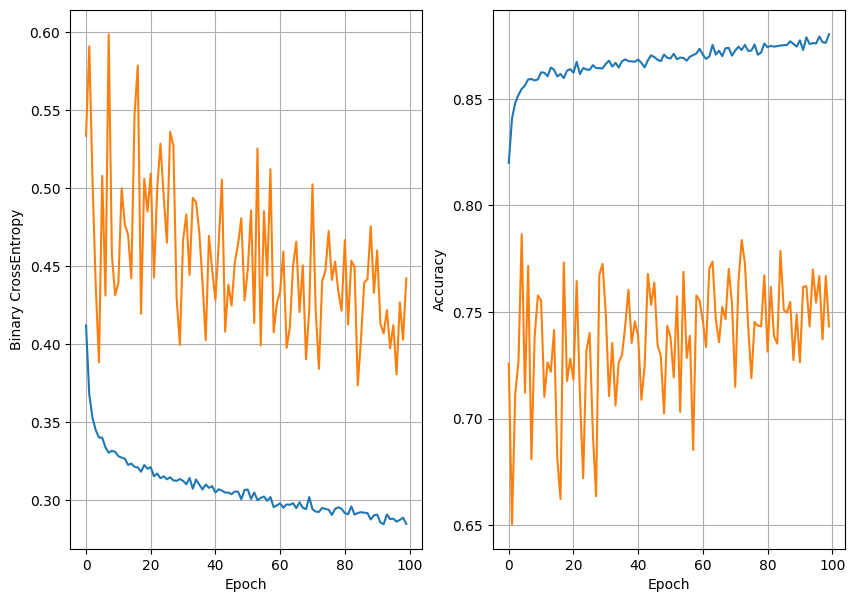

119/119 [==============================] - 0s 3ms/step - loss: 0.3059 - accuracy: 0.8764
64 nodes, dropout 0.2, lr is 0.005, batch_size is 64


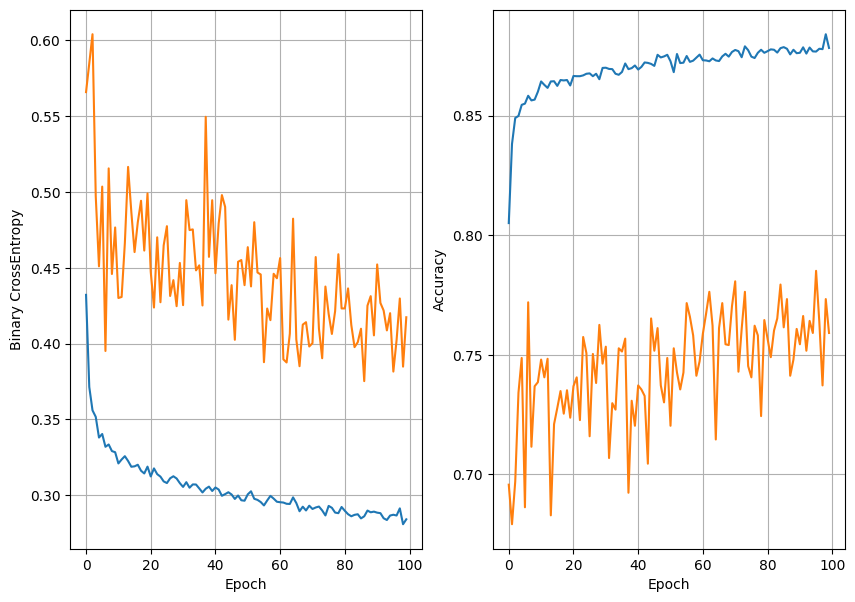

119/119 [==============================] - 0s 3ms/step - loss: 0.3031 - accuracy: 0.8780
64 nodes, dropout 0.2, lr is 0.005, batch_size is 128


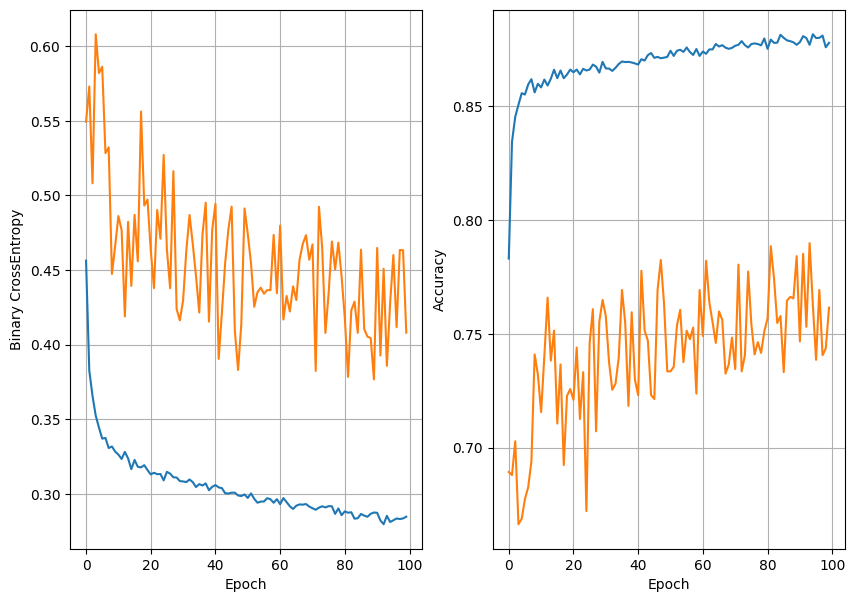

119/119 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.8783
64 nodes, dropout 0.2, lr is 0.001, batch_size is 32


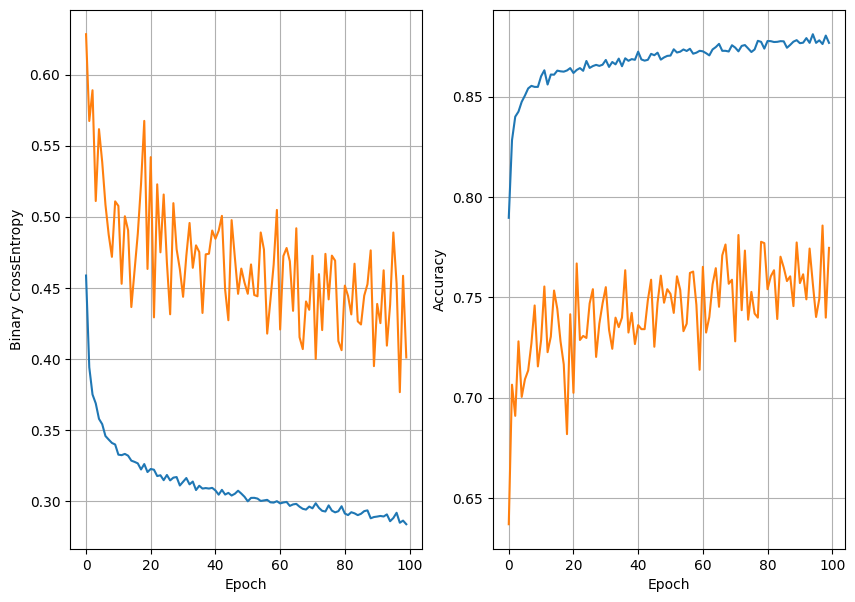

119/119 [==============================] - 0s 4ms/step - loss: 0.2937 - accuracy: 0.8817
64 nodes, dropout 0.2, lr is 0.001, batch_size is 64


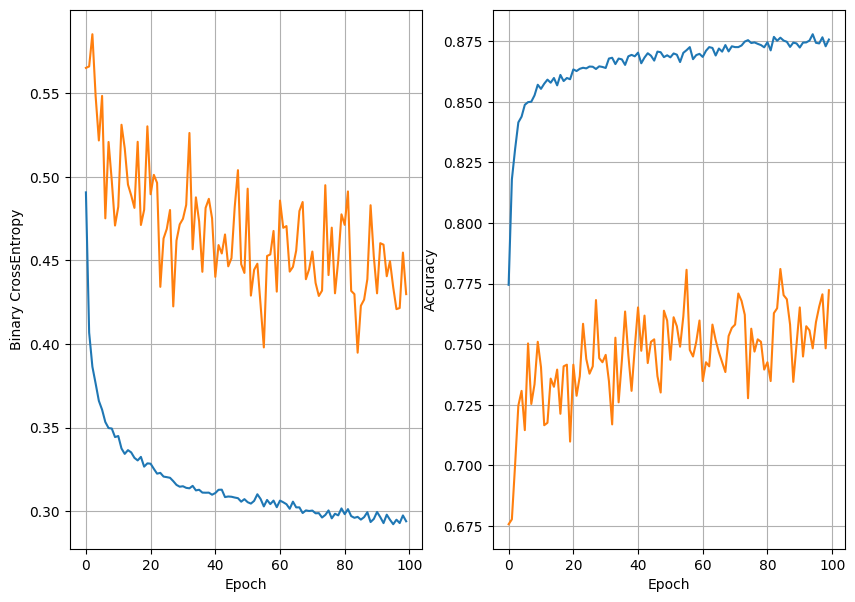

119/119 [==============================] - 0s 3ms/step - loss: 0.2938 - accuracy: 0.8809
64 nodes, dropout 0.2, lr is 0.001, batch_size is 128


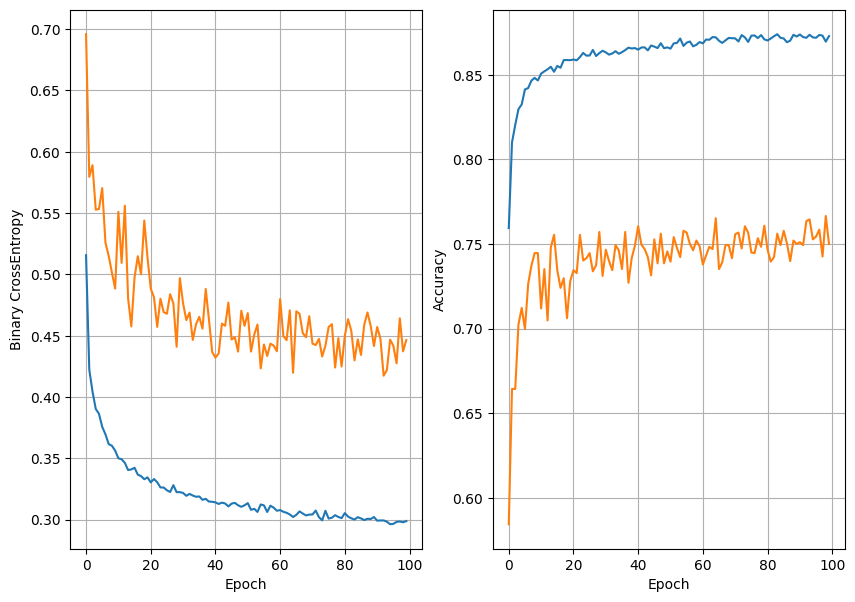

119/119 [==============================] - 0s 3ms/step - loss: 0.2936 - accuracy: 0.8817


In [48]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.1, 0.005, 0.001 ]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr is {lr}, batch_size is {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs )
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss

          least_loss_model = model